Your Name and PRN:
- Name : Kunal Kurve and Manasi Malge 
- PRN  : 240340128012 and 240340128013

# Image Processing with Neural Network

## Assignment: A04
### Take Neural Network with :
- Multiple hidden layers 
- Activation function of your choice

## Import Statements

In [61]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Global Parameters

In [62]:
###----------------
### Some parameters
###----------------

RANDOM_STATE =24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2 
EPOCHS = 100 # number of epochs 
ALPHA = 1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [63]:
# make_moon is a in-built library which generates two class classification dataset

X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [64]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])
data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [66]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [67]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

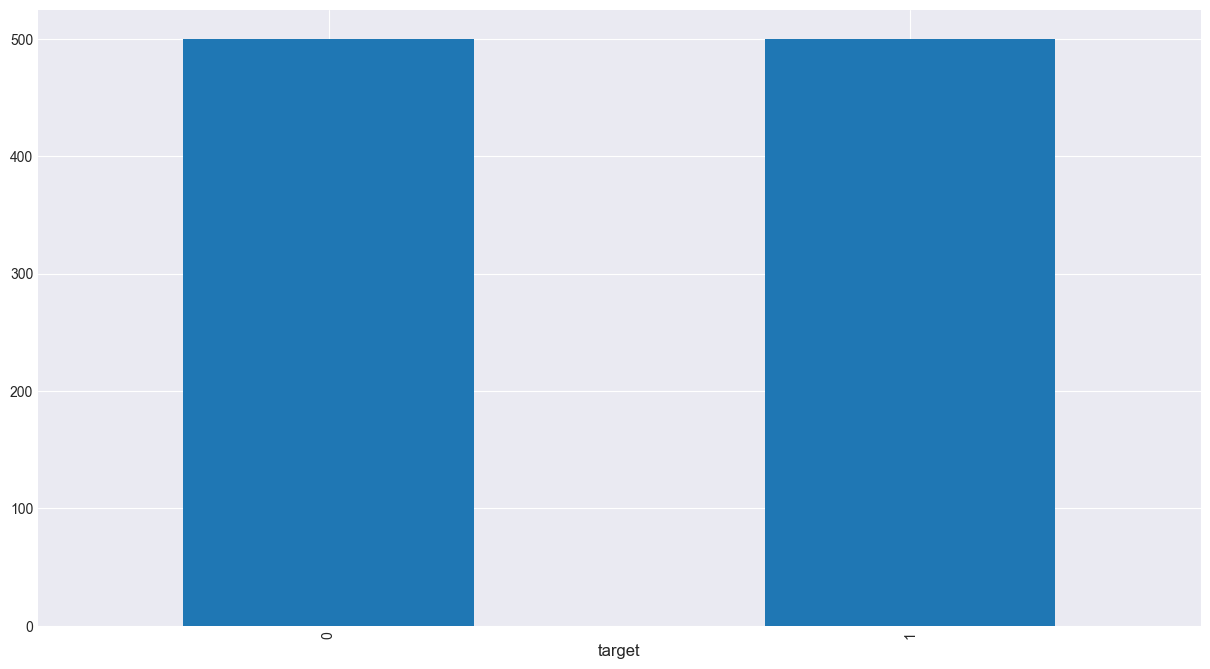

In [68]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

## Plotting data

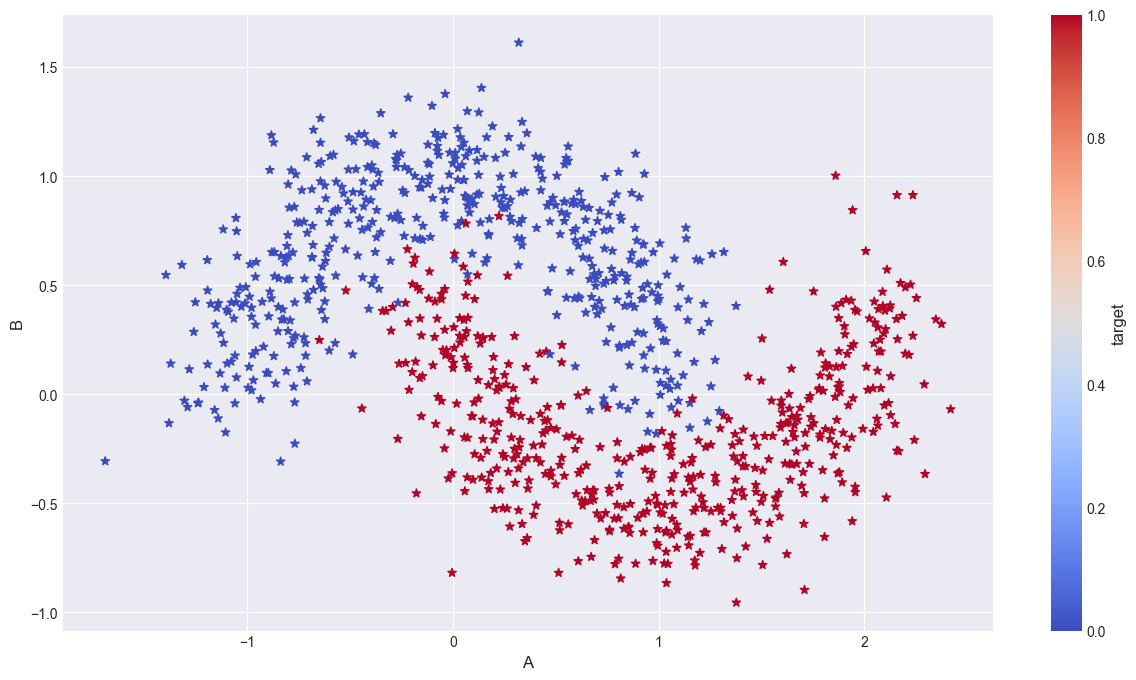

In [69]:
data_df.plot.scatter('A', 'B',      # columns to plot (x=A, y=B)
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

In [70]:
y =pd.get_dummies(y).to_numpy()
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

## Split the data in training and test sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800, 2), (200, 2), (200, 2))

In [72]:
type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

## Softmax function

In [73]:
def fn_softmax(z : np.ndarray)-> np.ndarray:
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        sigmoid values of z
    
    '''
    
    exp_z=np.exp(z)
    return exp_z/np.sum(exp_z, axis=1, keepdims=True)

In [74]:
# Sum of all softmax components will be sum equal to 1

sm = fn_softmax(np.asarray([[8, 5, 0], [-10, 0., 10]]))
print(sm)
sm.sum(axis=1, keepdims=True)

[[9.52269826e-01 4.74107229e-02 3.19450938e-04]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]]


array([[1.],
       [1.]])

## Activation Functions

### 1. Tanh Function

In [75]:
# def fn_activ(z): # g(z); Tanh function
#     return np.tanh(z)

# def fn_activ_prime(a): # g'(z); Derivative of Tanh function
#     return 1. - np.tanh(a)**2

### 2. ReLU Function

In [76]:
def fn_activ(z): # ReLU activation function
    return np.maximum(0, z)

def fn_activ_prime(z): # Derivative of ReLU
    return np.where(z > 0, 1, 0)

### 3. Swish Function

In [77]:
# def fn_activ(z): # Swish activation function
#     return z / (1 + np.exp(-z))

# def fn_activ_prime(z): # Derivative of Swish
#     sigmoid = 1 / (1 + np.exp(-z))
#     return sigmoid * (1 + z * (1 - sigmoid))

### Forward Propagation

In [78]:
def predict(model, X_p): 

    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']
    
    ######################
    # Forward Propagation
    ######################

    ######## Layer 1 ########   
    z1 = X_p.dot(W1) + b1   # Aggregation Function
    a1 = fn_activ(z1)       # Activation Function
    ######## Layer 2 ########
    z2 = a1.dot(W2) + b2    # Aggregation Function
    a2 = fn_activ(z2)       # Activation Function
    ######## Layer 3 ########
    z3 = a2.dot(W3) + b3    # Aggregation Function
    a3 = fn_activ(z3)       # Activation Function
    ######## Layer 4 ########
    z4 = a3.dot(W4) + b4    # Aggregation Function
    a4 = fn_activ(z4)       # Activation Function
    ######## Layer 5 ########
    z5 = a4.dot(W5) + b5    # Aggregation Function
    a5 = fn_softmax(z5)     # Activation Function
        
    return np.argmax(a5, axis=1) 
    # Picks index of class with highest probability

In [79]:
def calculate_loss(model, X_l, y_l): 
    # Use of predict in forward propagation
    
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']
    
    m = X_l.shape[0]
    
    ######################
    # Forward Propagation
    ######################

    ######## Layer 1 ######## 
    z1 = X_l.dot(W1) + b1   # Aggregation Function
    a1 = fn_activ(z1)       # Activation Function
    ######## Layer 2 ########
    z2 = a1.dot(W2) + b2    # Aggregation Function
    a2 = fn_activ(z2)       # Activation Function
    ######## Layer 3 ########
    z3 = a2.dot(W3) + b3    # Aggregation Function
    a3 = fn_activ(z3)       # Activation Function
    ######## Layer 4 ########
    z4 = a3.dot(W4) + b4    # Aggregation Function
    a4 = fn_activ(z4)       # Activation Function
    ######## Layer 5 ########
    z5 = a4.dot(W5) + b5    # Aggregation Function
    a5 = fn_softmax(z5)     # Activation Function
    
    data_loss = -(y_l*np.log(a5) + (1-y_l)*np.log(1-a5)).sum()
        
    return data_loss / m

# Multiple Layer

- Input Layer
- Layer 1 - 5 - ReLU
- Layer 2 - 5 - ReLu
- Layer 3 - 4 - ReLu
- Layer 4 - 3 - ReLu
- Output Layer

In [80]:
param = {}
param['nn_dim'] = [X_train.shape[1], 5, 5, 4, 3] 
loss_hist = {}

## Stochastic Gradient Descent

- No. of features is fixed, Hence Input shape is Fixed
- No. of Output is fixed, Hence Output shape is Fixed

In [81]:
def build_model(param, X_train, y_train, nn_out, epochs=EPOCHS, alpha=ALPHA):
    
    '''
    Args: 
        'param': Parameters for building the model
        'X_train':Training features, 
        'y_train':Training labels, 
        'nn_out':Size of Output,
        'nn_hdim':No. of nodes in hidden layer
    '''
    m, nn_input_dim = X_train.shape
    nn_output_dim = nn_out
    
    # Layer 1
    W1 = np.random.rand(param['nn_dim'][0], param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])
    b1 = np.zeros((1, param['nn_dim'][1]), dtype=np.float32)

    # Layer 2
    W2 = np.random.rand(param['nn_dim'][1], param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])
    b2 = np.zeros((1, param['nn_dim'][2]), dtype=np.float32)

    # Layer 3
    W3 = np.random.rand(param['nn_dim'][2], param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])
    b3 = np.zeros((1, param['nn_dim'][3]), dtype=np.float32)

    # Layer 4
    W4 = np.random.rand(param['nn_dim'][3], param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])
    b4 = np.zeros((1, param['nn_dim'][4]), dtype=np.float32)

    # Output Layer
    W5 = np.random.rand(param['nn_dim'][4], nn_output_dim) / np.sqrt(param['nn_dim'][4])
    b5 = np.zeros((1, nn_output_dim), dtype=np.float32)
    
    curr_loss = 0
    
    loss,epoch = [], []
    
    for i in range(0,epochs):
        
        ######################
        # Forward Propagation
        ######################

        ######## Layer 1 ########
        z1 = X_train.dot(W1) + b1   # Aggregation Function
        a1 = fn_activ(z1)           # Activation Function
        ######## Layer 2 ########
        z2 = a1.dot(W2) + b2        # Aggregation Function
        a2 = fn_activ(z2)           # Activation Function
        ######## Layer 3 ########
        z3 = a2.dot(W3) + b3        # Aggregation Function
        a3 = fn_activ(z3)           # Activation Function
        ######## Layer 4 ########
        z4 = a3.dot(W4) + b4        # Aggregation Function
        a4 = fn_activ(z4)           # Activation Function
        ######## Layer 5 ########
        z5 = a4.dot(W5) + b5        # Aggregation Function
        a5 = fn_softmax(z5)           # Activation Function
        
        ######################
        # Backward Propagation
        ######################

        ######## Layer 5 ########
        
        assert(a5.shape == y_train.shape), f'check y {a5.shape}/{y_train.shape}'
        dz5 = a5 - y_train # Remember: a2 & y dimensions need to be same
        
        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'check W5 {W5.shape}/{dW5.shape}'
        
        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'
        
        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'
        
        ######## Layer 4 ########        
        
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'
        
        dW4 = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'
        
        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'
        
        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'
        
        ######## Layer 3 ########
        
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'check z3 {z4.shape}/{dz3.shape}'
        
        dW3 = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'
        
        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert(b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'
        
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'
        
        ######## Layer 2 ########

        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'

        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'
        
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'
        
        ######## Layer 1 ########
        
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check a2 {z1.shape}/{dz1.shape}'
        
        dW1 = (X_train.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'
        
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        # Gradient Update
        
        W1 += -alpha * dW1 / m
        b1 += -alpha * db1 / m
        
        W2 += -alpha * dW2 / m
        b2 += -alpha * db2 / m
        
        W3 += -alpha * dW3 / m
        b3 += -alpha * db3 / m
        
        W4 += -alpha * dW4 / m
        b4 += -alpha * db4 / m
        
        W5 += -alpha * dW5 / m
        b5 += -alpha * db5 / m
        
        model = {'W1':W1, 'b1':b1, 
                 'W2':W2, 'b2':b2,
                 'W3':W3, 'b3':b3,
                 'W4':W4, 'b4':b4,
                 'W5':W5, 'b5':b5}
    
        curr_loss = calculate_loss(model , X_train, y_train)
        loss.append(curr_loss)
        
        epoch.append(i)
        
        if i%5 == 0:
            print(f'After epochs:{i:3d}; loss: {curr_loss: .5f}')
    
    loss_hist['epoch']= epoch
    loss_hist['loss']= loss
    
    return model

## Build Model

In [82]:
nn_output_dim = 2

model = build_model(param, X_train, y_train, nn_output_dim, epochs=EPOCHS, alpha=ALPHA)

After epochs:  0; loss:  1.36135
After epochs:  5; loss:  1.23290
After epochs: 10; loss:  1.05942
After epochs: 15; loss:  0.89515
After epochs: 20; loss:  0.74391
After epochs: 25; loss:  0.72832
After epochs: 30; loss:  0.69596
After epochs: 35; loss:  1.74927
After epochs: 40; loss:  0.69399
After epochs: 45; loss:  0.82034
After epochs: 50; loss:  0.75502
After epochs: 55; loss:  0.69417
After epochs: 60; loss:  1.05334
After epochs: 65; loss:  0.73267
After epochs: 70; loss:  0.68654
After epochs: 75; loss:  0.88123
After epochs: 80; loss:  0.75362
After epochs: 85; loss:  0.67069
After epochs: 90; loss:  0.72874
After epochs: 95; loss:  0.85585


In [83]:
model

{'W1': array([[ 1.09224852,  0.38773438,  0.47176652,  0.0068571 ,  0.33544507],
        [-0.22233362,  0.33485287, -1.72120798, -1.521324  , -1.1555203 ]]),
 'b1': array([[-0.9970334 , -0.14441031,  0.5260404 ,  0.41355497,  0.372551  ]],
       dtype=float32),
 'W2': array([[ 0.32995835,  0.32244376,  0.57330781,  0.73079555,  0.49465564],
        [-0.29647577,  0.13357708,  0.02311367, -0.02477146,  0.09595894],
        [ 0.56778226,  0.17104146,  0.40838726,  0.51901754,  0.58098897],
        [ 0.60330993,  0.46532394,  0.40551799,  0.46622127,  0.24562962],
        [ 0.28580646,  0.35173624,  0.40682564,  0.31172965,  0.37307976]]),
 'b2': array([[-0.01446257, -0.07368865, -0.03840145, -0.02342442, -0.05937158]],
       dtype=float32),
 'W3': array([[0.23348076, 0.37264808, 0.28233362, 0.42228377],
        [0.13545292, 0.21749907, 0.32627935, 0.14109652],
        [0.09167684, 0.23737802, 0.31630105, 0.52225997],
        [0.20558927, 0.35352121, 0.48430445, 0.47742512],
        [0.

## Plot Graph for Loss

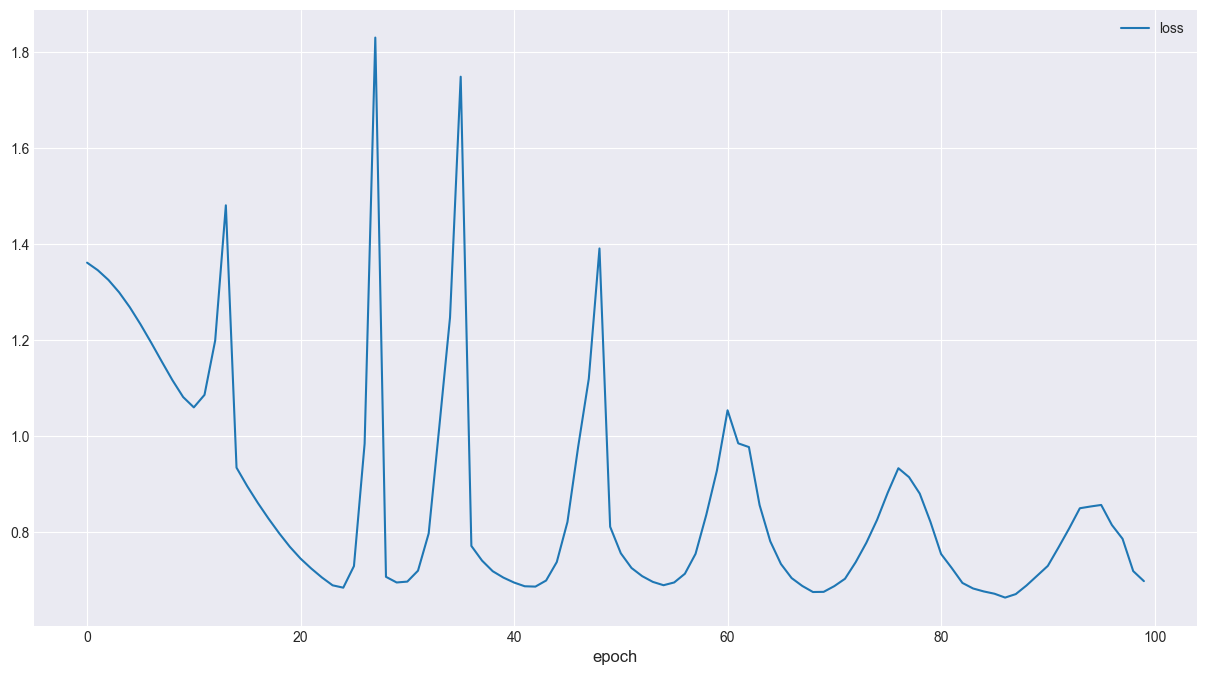

In [84]:
pd.DataFrame(loss_hist).plot(x='epoch');

## Accuracy Scores

In [85]:
y_pred_train = predict(model, X_train)
print("Accuracy Score for Train =",
      accuracy_score(y_train.argmax(axis=1),y_pred_train))

Accuracy Score for Train = 0.87875


In [86]:
y_pred_test = predict(model, X_test)
print("Accuracy Score for Test =",
      accuracy_score(y_test.argmax(axis=1),y_pred_test))

Accuracy Score for Test = 0.865


'\nnumpy.argmax(a, axis=None, out=None, *, keepdims=<no value>)\nReturns the indices of the maximum values along an axis.\n'

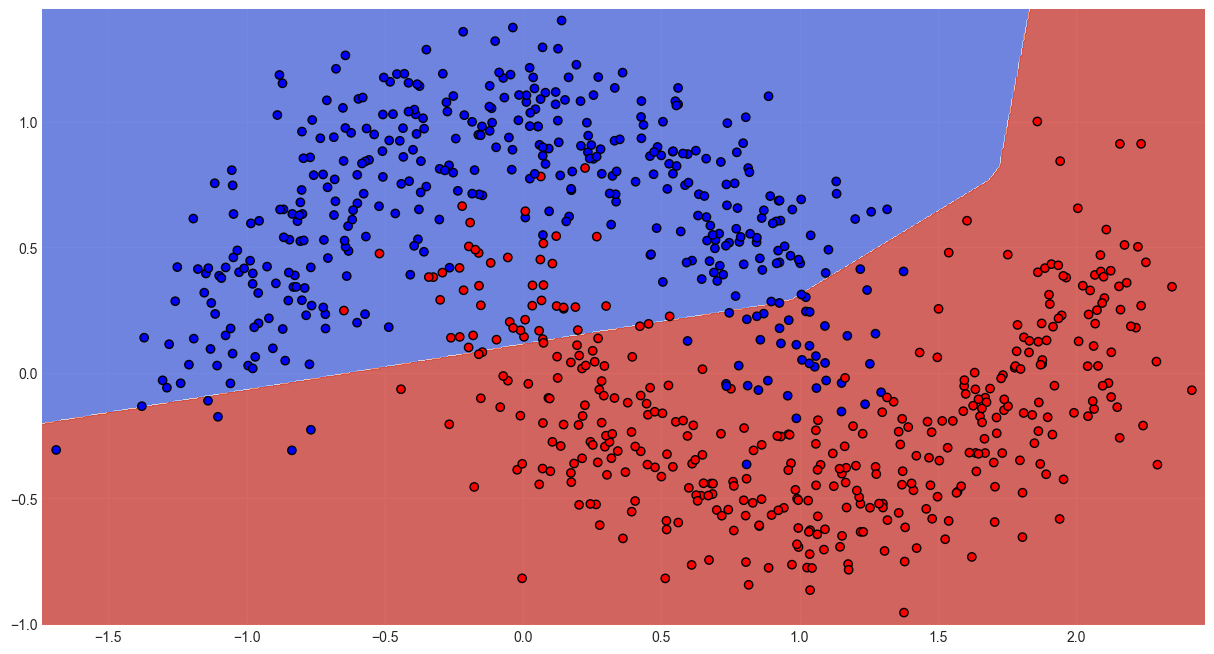

In [87]:
X = X_train
fig,ax = plt.subplots()
dm =0.005 # Grid Spacing
x_min , x_max = X[:,0].min() - 0.05 , X[:, 0].max() + 0.05
y_min , y_max = X[:,1].min() - 0.05 , X[:, 1].max() + 0.05

# np.meshagrid(): Return a list of coordinate matrices from coordinate vectors.
xx , yy  = np.meshgrid(np.arange(x_min,x_max,dm),
                       np.arange(y_min,y_max,dm))

#.c_: Translates slice objects to concatenation along the second axis.
XX = np.c_[xx.ravel(),yy.ravel()]

# np.hstack(): Stack arrays in sequence horizontally (column wise).
# XX = np.hstack((XX, np.ones((XX.shape[0] , 1))))

y_pred = predict(model, XX)
 
# for row in XX:
#     pred = predict(model , XX)
#     y_pred.append(np.round(pred))
z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,z ,cmap = CMAP , alpha =0.8)
ax.scatter(X[:,0], X[:,1], c=y_train.argmax(axis=1), edgecolors='k', cmap=plt.cm.bwr)

'''
numpy.argmax(a, axis=None, out=None, *, keepdims=<no value>)
Returns the indices of the maximum values along an axis.
'''

## Confusion Matrix

In [88]:
cm_train = confusion_matrix(y_test.argmax(axis=1), y_pred_test)
print("Confusion Matrix for Train:\n", cm_train)

cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test)
print("Confusion Matrix for Test:\n", cm_test)

Confusion Matrix for Train:
 [[84 11]
 [16 89]]
Confusion Matrix for Test:
 [[84 11]
 [16 89]]


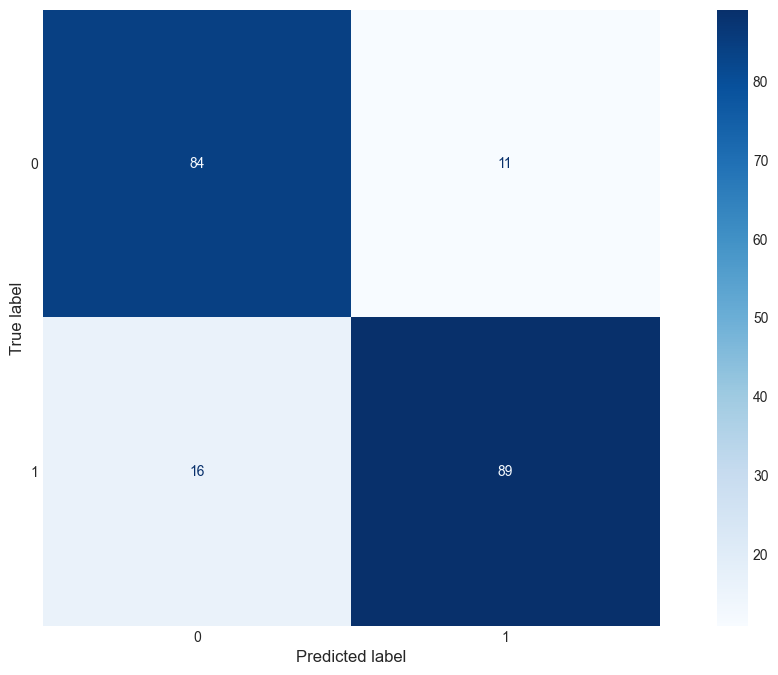

In [89]:
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels = [0,1])
fig, ax = plt.subplots()
disp_train.plot(ax=ax, cmap='Blues')
ax.grid(False)

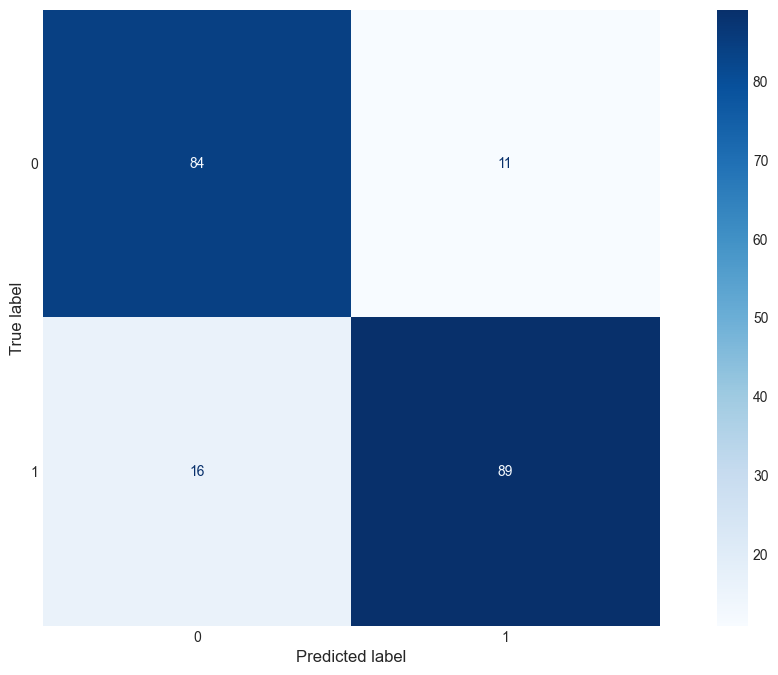

In [90]:
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels = [0,1])
fig, ax = plt.subplots()
disp_test.plot(ax=ax, cmap='Blues')
ax.grid(False)

- **Q1**: Is this model more accurate compared to previous model?

<br>

- **Tanh**: Shows consistent performance with moderate learning rates, achieving high accuracy and stable training.

- **ReLU**: Performs well with moderate learning rates, but can show irregularities in the loss curve with higher alpha value (Learning Rate).

- **Swish**: Achieves high accuracy with moderate learning rates, but may suffer from instability and NaN values in the loss curve with high learning rates.

- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

<br>
<br>

| # | Dimension of hidden layer | Learning rate | Activation Function | Training Accuracy | Test Accuracy | Comment                                                                                                                          |
| - | ------------------------- | ------------- | ------------------- | ----------------- | ------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| 1 |   5-5-4-3-2                 | 0.01          | Tanh                | 0.6421           | 0.62          | Achieves less accuracy with 100 epochs.                                               
|   | 5-5-4-3-2                 | 0.5           | Tanh                | 0.9012       |0.8814| good accuarcy with intermediate learning rate.            
|   | 5-5-4-3-2                 | 1             | Tanh                | 0.881           | 0.8614       | Small fluctuations in the curve.                 |
|   |                           |               |                     |                   |               |                                                                                                                                                                                        |
|   | 5-5-4-3-2                 | 0.01          | ReLU                | 0.54           | 0.56        | Less accuracy with no proper curve.                                                                                   |                                                        |
|   | 5-5-4-3-2                 | 0.5           | ReLU                |  0.88375        | 0.855          | No much variation in training and testing accuracy.                                                    |
|   | 5-5-4-3-2                 | 1             | ReLU                | 0.87875          | 0.865         | Strange curve more spike after 28 epochs.                     |
|   |                           |               |                     |                   |                                                                                                                                                                                                     |
| 2 | 10-5-4-3-2                | 0.001         | Tanh                | 0.52375           | 0.475          | Accuracy is too low for both train and test.                                                                        |                                                                                           |
|   | 10-5-4-3-2                | 0.5           | Tanh                | 0.89125           | 0.87          | High accuracy with stable training.                                                                                              |                    |
|   | 10-5-4-3-2                | 1             | Tanh                | 0.785           |  0.795         | Bit less accuracy; and less stable training.                                                                                          |
|   |                           |               |                     |                   |               |                                                                                                                                  |
|   | 10-5-4-3-2                | 0.001         | ReLU                | 0.475           | 0.445          | Decision boundary shows no significant results.                                                                                                                                                      |
|   | 10-5-4-3-2                | 1           | ReLU                | 0.86125           | 0.86          | Less  accuracy compared to 0.5.                                                                                                      |
|   | 10-5-4-3-2                | 0.5           | ReLU                | 0.8925          | 0.875         | Acccuracy is increased and performs good on test data also.|                                                                                                                       